# Final Project

For this project, I decided to focus on data visualization in the form of maps. Maps are important for public health because they indicate which areas are most affected by a health problem and where resources should be allocated for health programs.

The data I used came from data.gov (the CDC specifically) and contains the three-year average for incidence of mortality among those with cardiovascular disease in the US among adults 35 years old or older for each county in the US. This data was also age-adjusted to account for age as a confounder in incidence of mortality.

The dataframe contained a column that included coordinates for each county, which I used to construct a scatterplot on a map of the continental United States. I adjusted the sizes and color for each point depending on the magnitude of the value for the incidence to clearly indicate which areas geographically in the USA had higher incidence of mortality due to heart disease.

In [1]:
!conda install basemap --yes

Solving environment: done

# All requested packages already installed.



In [2]:
!conda install basemap-data-hires --yes

Solving environment: done

# All requested packages already installed.



In [3]:
!conda install matplotlib --yes

Solving environment: done

# All requested packages already installed.



In [4]:
!conda install pyproj --yes

Solving environment: done

# All requested packages already installed.



In [5]:
from my_module.functions import separate, remove_last_chara, remove_first_chara

In [6]:
import os
os.environ['PROJ_LIB'] = '/Users/manar/anaconda3/share/proj'

In [7]:
import matplotlib.pyplot as plt
import matplotlib.cm
from mpl_toolkits.basemap import Basemap
import pandas as pd

In [8]:
#we import our dataframe
cvd_mortality = pd.read_csv('/Users/manar/Downloads/Heart_Disease_Mortality_Data_Among_US_Adults__35___by_State_Territory_and_County.csv')

In [9]:
#printing it to see what our data looks like
cvd_mortality

,Year,LocationAbbr,LocationDesc,GeographicLevel,DataSource,Class,Topic,Data_Value,Data_Value_Unit,Data_Value_Type,Data_Value_Footnote_Symbol,Data_Value_Footnote,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,TopicID,LocationID,Location 1
0,2015,AK,Aleutians East,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,110.1,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2013,"(55.440626, -161.962562)"
1,2015,AK,Aleutians West,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,172.8,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2016,"(52.995403, -170.251538)"
2,2015,AK,Anchorage,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,259.3,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2020,"(61.159049, -149.103905)"
3,2015,AK,Bethel,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,319.2,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2050,"(60.924483, -159.749655)"
4,2015,AK,Bristol Bay,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,NaN,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",~,Insufficient Data,Gender,Overall,Race/Ethnicity,Overall,T2,2060,"(58.754192, -156.694709)"
5,2015,AK,Denali,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,300.7,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2068,"(63.678399, -149.962076)"
6,2015,AK,Dillingham,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,462.7,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2070,"(59.803151, -158.181608)"
7,2015,AK,Fairbanks North Star,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,297.8,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2090,"(64.809327, -146.586265)"
8,2015,AK,Haines,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,326.5,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2100,"(59.140721, -135.513878)"
9,2015,AK,Juneau,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,326.5,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2110,"(58.478434, -134.150437)"


In [10]:
#we remove the missing values from the Data_Value column, which is what we're interested in
cvd_mortality = cvd_mortality.dropna(axis=0, subset=['Data_Value'])

In [11]:
#print again to check if there are any missing values left in that column
cvd_mortality

,Year,LocationAbbr,LocationDesc,GeographicLevel,DataSource,Class,Topic,Data_Value,Data_Value_Unit,Data_Value_Type,Data_Value_Footnote_Symbol,Data_Value_Footnote,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,TopicID,LocationID,Location 1
0,2015,AK,Aleutians East,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,110.1,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2013,"(55.440626, -161.962562)"
1,2015,AK,Aleutians West,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,172.8,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2016,"(52.995403, -170.251538)"
2,2015,AK,Anchorage,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,259.3,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2020,"(61.159049, -149.103905)"
3,2015,AK,Bethel,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,319.2,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2050,"(60.924483, -159.749655)"
5,2015,AK,Denali,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,300.7,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2068,"(63.678399, -149.962076)"
6,2015,AK,Dillingham,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,462.7,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2070,"(59.803151, -158.181608)"
7,2015,AK,Fairbanks North Star,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,297.8,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2090,"(64.809327, -146.586265)"
8,2015,AK,Haines,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,326.5,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2100,"(59.140721, -135.513878)"
9,2015,AK,Juneau,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,326.5,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2110,"(58.478434, -134.150437)"
10,2015,AK,Kenai Peninsula,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,298.6,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2122,"(60.271254, -151.556972)"


In [12]:
#we are interested in mapping out the general trends in incidence of cardiovascular disease mortality in the US
#so we subset the dataframe to exclude data separated by race and gender
cvd_mortality = cvd_mortality.loc[(cvd_mortality.Stratification1 == 'Overall') 
                & (cvd_mortality.Stratification2 == 'Overall')]

In [13]:
#print to double check
cvd_mortality

,Year,LocationAbbr,LocationDesc,GeographicLevel,DataSource,Class,Topic,Data_Value,Data_Value_Unit,Data_Value_Type,Data_Value_Footnote_Symbol,Data_Value_Footnote,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,TopicID,LocationID,Location 1
0,2015,AK,Aleutians East,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,110.1,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2013,"(55.440626, -161.962562)"
1,2015,AK,Aleutians West,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,172.8,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2016,"(52.995403, -170.251538)"
2,2015,AK,Anchorage,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,259.3,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2020,"(61.159049, -149.103905)"
3,2015,AK,Bethel,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,319.2,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2050,"(60.924483, -159.749655)"
5,2015,AK,Denali,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,300.7,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2068,"(63.678399, -149.962076)"
6,2015,AK,Dillingham,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,462.7,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2070,"(59.803151, -158.181608)"
7,2015,AK,Fairbanks North Star,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,297.8,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2090,"(64.809327, -146.586265)"
8,2015,AK,Haines,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,326.5,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2100,"(59.140721, -135.513878)"
9,2015,AK,Juneau,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,326.5,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2110,"(58.478434, -134.150437)"
10,2015,AK,Kenai Peninsula,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,298.6,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2122,"(60.271254, -151.556972)"


In [14]:
#this is required to prevent an error in the next line
pd.options.mode.chained_assignment = None

In [15]:
#we separate Longitude and Latitude into separate columns
separate(cvd_mortality, 'Latitude', 'Longitude', 'Location 1', ',')

,Year,LocationAbbr,LocationDesc,GeographicLevel,DataSource,Class,Topic,Data_Value,Data_Value_Unit,Data_Value_Type,...,Data_Value_Footnote,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,TopicID,LocationID,Location 1,Latitude,Longitude
0,2015,AK,Aleutians East,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,110.1,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",...,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2013,"(55.440626, -161.962562)",(55.440626,-161.962562)
1,2015,AK,Aleutians West,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,172.8,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",...,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2016,"(52.995403, -170.251538)",(52.995403,-170.251538)
2,2015,AK,Anchorage,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,259.3,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",...,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2020,"(61.159049, -149.103905)",(61.159049,-149.103905)
3,2015,AK,Bethel,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,319.2,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",...,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2050,"(60.924483, -159.749655)",(60.924483,-159.749655)
5,2015,AK,Denali,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,300.7,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",...,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2068,"(63.678399, -149.962076)",(63.678399,-149.962076)
6,2015,AK,Dillingham,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,462.7,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",...,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2070,"(59.803151, -158.181608)",(59.803151,-158.181608)
7,2015,AK,Fairbanks North Star,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,297.8,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",...,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2090,"(64.809327, -146.586265)",(64.809327,-146.586265)
8,2015,AK,Haines,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,326.5,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",...,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2100,"(59.140721, -135.513878)",(59.140721,-135.513878)
9,2015,AK,Juneau,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,326.5,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",...,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2110,"(58.478434, -134.150437)",(58.478434,-134.150437)
10,2015,AK,Kenai Peninsula,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,298.6,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",...,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2122,"(60.271254, -151.556972)",(60.271254,-151.556972)


In [16]:
#we remove parentheses on either end of Longitude and Latitude values
remove_last_chara(cvd_mortality, 'Longitude')

remove_first_chara(cvd_mortality, 'Latitude')

,Year,LocationAbbr,LocationDesc,GeographicLevel,DataSource,Class,Topic,Data_Value,Data_Value_Unit,Data_Value_Type,...,Data_Value_Footnote,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,TopicID,LocationID,Location 1,Latitude,Longitude
0,2015,AK,Aleutians East,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,110.1,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",...,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2013,"(55.440626, -161.962562)",55.440626,-161.962562
1,2015,AK,Aleutians West,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,172.8,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",...,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2016,"(52.995403, -170.251538)",52.995403,-170.251538
2,2015,AK,Anchorage,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,259.3,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",...,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2020,"(61.159049, -149.103905)",61.159049,-149.103905
3,2015,AK,Bethel,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,319.2,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",...,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2050,"(60.924483, -159.749655)",60.924483,-159.749655
5,2015,AK,Denali,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,300.7,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",...,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2068,"(63.678399, -149.962076)",63.678399,-149.962076
6,2015,AK,Dillingham,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,462.7,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",...,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2070,"(59.803151, -158.181608)",59.803151,-158.181608
7,2015,AK,Fairbanks North Star,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,297.8,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",...,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2090,"(64.809327, -146.586265)",64.809327,-146.586265
8,2015,AK,Haines,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,326.5,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",...,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2100,"(59.140721, -135.513878)",59.140721,-135.513878
9,2015,AK,Juneau,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,326.5,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",...,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2110,"(58.478434, -134.150437)",58.478434,-134.150437
10,2015,AK,Kenai Peninsula,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,298.6,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",...,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2122,"(60.271254, -151.556972)",60.271254,-151.556972


In [17]:
#convert the elements in the Longitude, Latitude, and Data_Value columns to floats
cvd_mortality['Latitude'] = pd.to_numeric(cvd_mortality['Latitude'], errors='coerce').fillna(0)

cvd_mortality['Longitude'] = pd.to_numeric(cvd_mortality['Longitude'], errors='coerce').fillna(0)

cvd_mortality['Data_Value'] = pd.to_numeric(cvd_mortality['Data_Value'], errors='coerce').fillna(0)

In [18]:
#we create an instance of a map using Basemap
#llcrnr stands for lower left corner and urcrnr stands for upper right corner
#we set the latitude and longitude of the map to show the continental United States
m = Basemap(llcrnrlon = -119, llcrnrlat = 20, urcrnrlon = -64, urcrnrlat = 49,
            projection = 'lcc',lat_1 = 33,lat_2 = 45,lon_0 = -95)

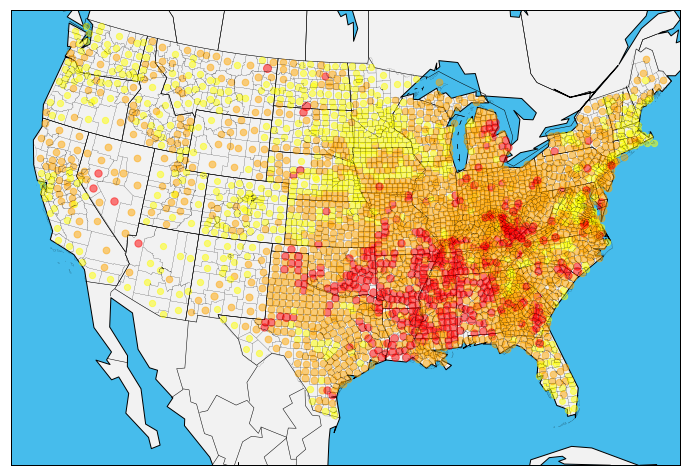

In [19]:
#we draw borders, the coast, the states, and county lines
plt.figure(figsize=(12, 16))
m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.drawstates()
m.drawcountries()
m.drawcounties(zorder=20)


#we set x and y to be Longitude and Latitude
x, y = m(cvd_mortality['Longitude'].values, cvd_mortality['Latitude'].values)


#we set Z to be the scaled-down incidence of cardiovascular disease mortality per 100,000 to use as sizes for the points
z = (cvd_mortality['Data_Value'].values/100) + 10


#since it's difficult to see the difference in size, we will also have the points be different colors
#we create a possible list of colors for the points to be
#we then choose what color each point is based on the magnitude of our scaled-down mortality data
for index in range(len(x)):
    colors = ['yellow', 'orange', 'red']
    if 0 < z[index] <= 13.0:
        color = colors[0]
    elif 13.0 < z[index] <= 14.5:
        color = colors[1]
    else:
        color = colors[2]
    m.plot(x[index], y[index], '.', markersize = z[index], color = color, alpha = 0.5)


As you can see, incidence of mortality per 100,000 due to cardiovascular disease is highest in the South (higher than 450 per 100,000!), and is lowest on the coasts as well as the western half of the United States. This implies that more education and better access to opportunities to exercise and healthy eating is necessary in the south in order to empower people to control their heart disease.